In [ ]:
%matplotlib inline
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.append("/home/konajain/code/lobSimulations")
from hawkes import dataLoader, fit, inference, simulate
import numpy as np

# FOMC, Apple 2019-2020

In [13]:
ric = "AAPL.OQ"
datesFOMC3 = [dt.date(2019,1,30), dt.date(2019,3,20), dt.date(2019,5,1), dt.date(2019,6,19), dt.date(2019,7,31), dt.date(2019,9,18), dt.date(2019,10,30), dt.date(2019,12,11)] #dt.date(2020,1,29), dt.date(2020,3,18), dt.date(2020,4,29), dt.date(2020,6,10)

In [101]:
t = 1800
sample_x = np.linspace(0, 23400, int(23400/t))
dataFOMC = {}
for i in datesFOMC3:
    empMids = pd.DataFrame(columns = ["datetime","mid"])
    for k in pd.date_range(i - dt.timedelta(days = 7), i + dt.timedelta(days=7)):
        l = dataLoader.Loader(ric, k, k, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
        data = l.load()
        if len(data): data = data[0]
        else: continue
        data['Mid'] = 0.5*(data['Ask Price 1'] + data['Bid Price 1'])
        mid = data.Mid.values
        times = data.Time.values - 34200
        # sample_x = np.linspace(0, 23400, int(23400/t))
        idxs = np.searchsorted(times, sample_x) - 1
        idxs[0] = 0
        sample_y = mid[idxs]
        if len(sample_y) != 13: print(sample_y)
        times = [dt.datetime(year = k.year, month = k.month, day = k.day) + dt.timedelta(minutes = 570 + j*30) for j in range(13)]
        empMids = empMids.append(pd.DataFrame({"datetime": times, "mid" : sample_y}))
    dataFOMC[i] = empMids
print(empMids)

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-23_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-28_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-29_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-30_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-31_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-01_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-04_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-05_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-06_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-13_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-14_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-15_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-18_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-19_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-20_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-21_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-22_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-26_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-27_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-26_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-29_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-30_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-01_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-02_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-03_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-06_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-07_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-08_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-12_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-13_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-14_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-17_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-18_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-19_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-20_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-21_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-26_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-26_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-29_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-30_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-31_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-01_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-02_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-05_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-06_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-07_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-11_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-12_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-13_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-16_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-17_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-18_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-19_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-20_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-23_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-23_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-25_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-28_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-29_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-30_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-31_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-01_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-04_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-05_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-06_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-04_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-05_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-06_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-09_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-10_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-11_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-12_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-13_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-16_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-17_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-18_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-22_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-23_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-24_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-27_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-28_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-29_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-30_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-31_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-02-03_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-02-04_34200000_57600000_message_10.csv


/tmp/ipykernel_1747/2757844287.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-02-05_34200000_57600000_message_10.csv


KeyboardInterrupt: 

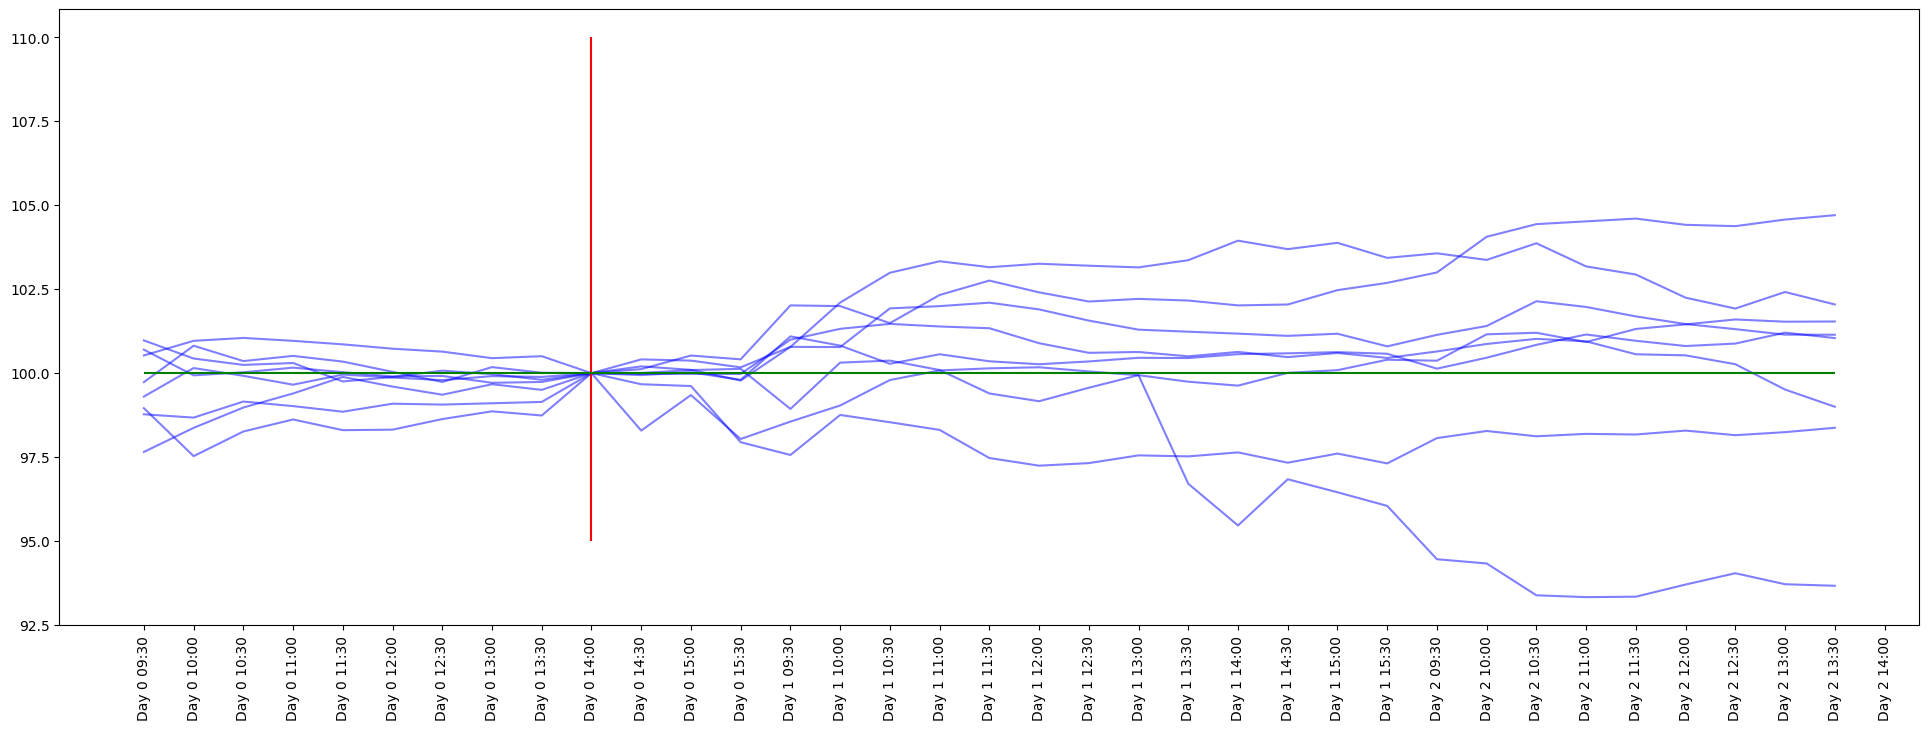

In [124]:
plt.figure(figsize=(24,8))
for k,empMids in dataFOMC.items():
    plt.plot(100*(empMids.mid.values/empMids.mid.values[74])[65:100], color = "b", alpha = 0.5)
plt.xticks(ticks = np.arange(len(empMids)),labels = ["Day " + str(int(j/13)) + dt.datetime.utcfromtimestamp(((i - np.datetime64('1970-01-01T00:00:00'))
                     / np.timedelta64(1, 's'))).strftime(" %H:%M") for i,j in zip(empMids.datetime.values, range(len(empMids)))], rotation =90)
plt.vlines(9, 95, 110, color = "red")
plt.hlines(100, 0, 34, color = "green")
plt.show()

# NFP

In [29]:
datesNFP = [dt.datetime.strptime(str(x), "%Y%m%d").date() for x in [20190201, 20190308, 20190405,20190503,20190607,20190705,20190802,20190906,20191004,20191101,20191206,20200110]]
ric = "AAPL.OQ"
sprs = [220, -88, 1, 42, -51, 40, 10, -24, 1, 55, 73, 5]

In [6]:
t = 1800
sample_x = np.linspace(0, 23400, int(23400/t))
dataNFP = {}
for i in datesNFP:
    empMids = pd.DataFrame(columns = ["datetime","mid"])
    for k in pd.date_range(i - dt.timedelta(days = 7), i + dt.timedelta(days=7)):
        l = dataLoader.Loader(ric, k, k, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
        data = l.load()
        if len(data): data = data[0]
        else: continue
        data['Mid'] = 0.5*(data['Ask Price 1'] + data['Bid Price 1'])
        mid = data.Mid.values
        times = data.Time.values - 34200
        # sample_x = np.linspace(0, 23400, int(23400/t))
        idxs = np.searchsorted(times, sample_x) - 1
        idxs[0] = 0
        sample_y = mid[idxs]
        if len(sample_y) != 13: print(sample_y)
        times = [dt.datetime(year = k.year, month = k.month, day = k.day) + dt.timedelta(minutes = 570 + j*30) for j in range(13)]
        empMids = empMids.append(pd.DataFrame({"datetime": times, "mid" : sample_y}))
    dataNFP[i] = empMids
print(empMids)

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-25_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-28_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-31_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-05_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-13_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-14_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-15_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-26_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-04-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-03_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-05-31_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-13_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-14_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-06-28_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-26_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-07-31_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-08-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-13_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-27_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-09-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-25_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-28_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-30_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-10-31_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-01_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-11-29_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-02_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-04_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-05_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-11_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-12_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-12-13_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-03_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-06_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-07_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-08_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-09_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-10_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-13_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-14_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-15_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-16_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2020-01-17_34200000_57600000_message_10.csv


/tmp/ipykernel_32152/2262880679.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()


              datetime      mid
0  2020-01-03 09:30:00  296.995
1  2020-01-03 10:00:00  298.255
2  2020-01-03 10:30:00  299.225
3  2020-01-03 11:00:00  298.460
4  2020-01-03 11:30:00  298.785
..                 ...      ...
8  2020-01-17 13:30:00  316.565
9  2020-01-17 14:00:00  316.630
10 2020-01-17 14:30:00  316.775
11 2020-01-17 15:00:00  317.205
12 2020-01-17 15:30:00  318.675

[143 rows x 2 columns]


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


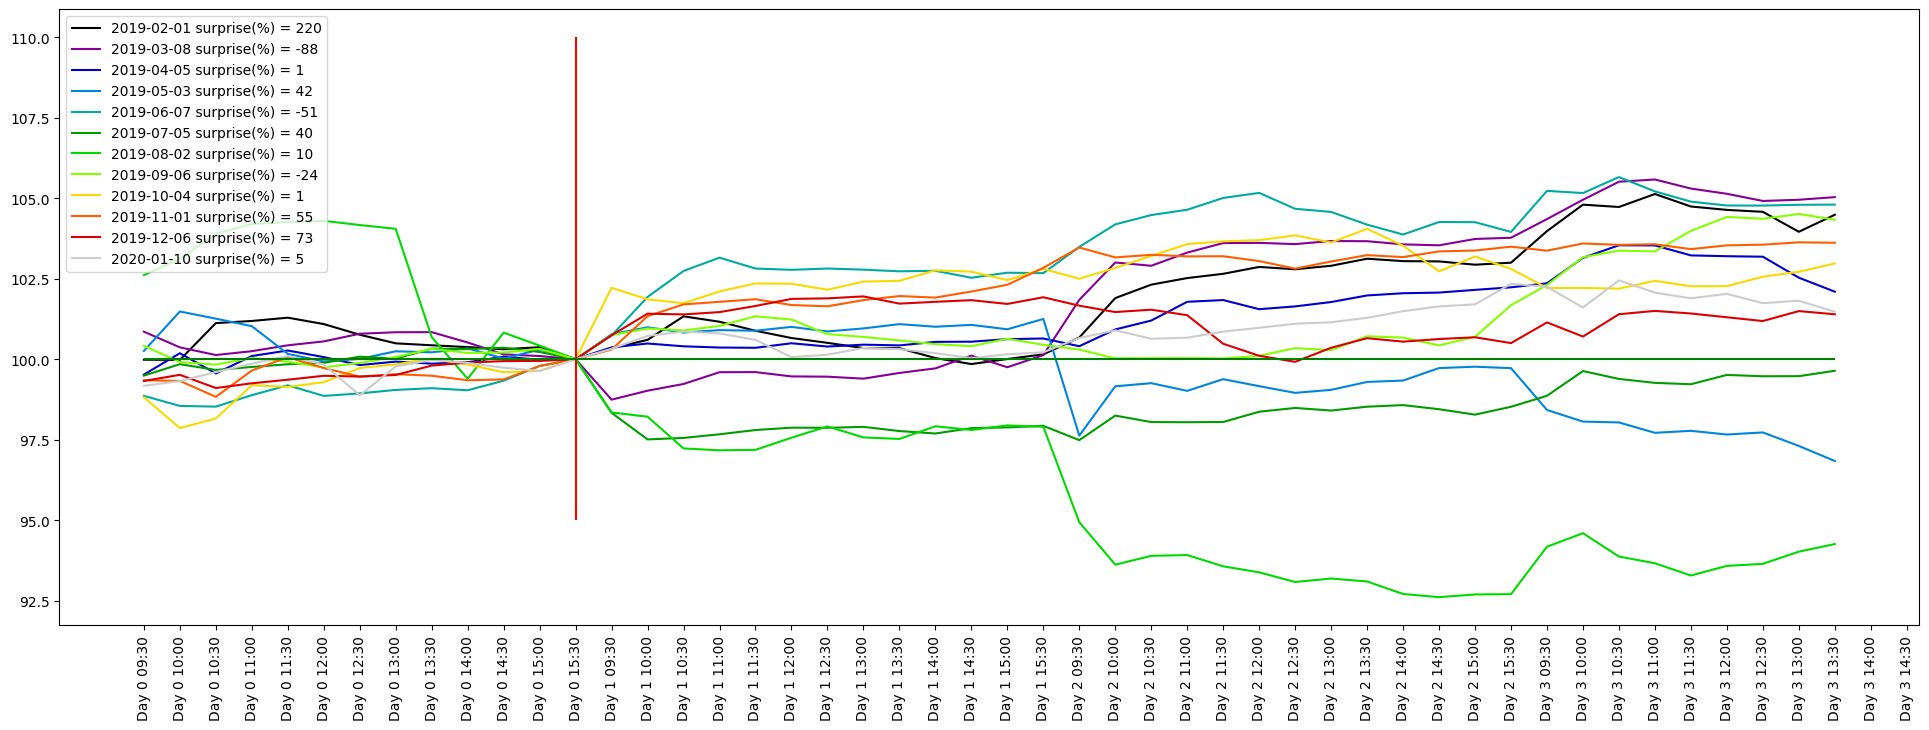

In [30]:
from cycler import cycler
fig1 = plt.figure(figsize=(24,8))
ax1 = fig1.add_subplot(111)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax1.set_prop_cycle(cycler('color', [colormap(i) for i in np.linspace(0, 1,len(dataNFP))]))
count = 0
for k,empMids in dataNFP.items():
    ax1.plot(100*(empMids.mid.values/empMids.mid.values[64])[52:100],label = k.strftime("%Y-%m-%d") + " surprise(%) = " + str(sprs[count]))
    count +=1
ax1.set_xticks(ticks = np.arange(len(empMids)),labels = ["Day " + str(int(j/13)) + dt.datetime.utcfromtimestamp(((i - np.datetime64('1970-01-01T00:00:00'))
                     / np.timedelta64(1, 's'))).strftime(" %H:%M") for i,j in zip(empMids.datetime.values, range(len(empMids)))], rotation =90)
ax1.vlines(12, 95, 110, color = "red")
ax1.hlines(100, 0, 47, color = "green")
ax1.legend()
plt.show()

In [9]:
empMids.iloc[65]

datetime    2020-01-10 09:30:00
mid                     310.715
Name: 0, dtype: object

In [34]:
(0.62*(1/3)**0.5) - 0.1

0.257957166897568

In [37]:
0.01*(1.1/0.6)**(2)

0.03361111111111112

# Sum of exp from power law:

In [ ]:
alpha = 1e3
gamma = 2e3
beta = 1.7
t = 10**(-1*np.arange(10))
plt.plot(t, alpha*(1+gamma*t)**(-1*beta))